<a href="https://colab.research.google.com/github/2796gaurav/Hands-OnStockMarketPrediction/blob/main/1_input_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# install dependencies

# https://github.com/ranaroussi/yfinance

!pip install yfinance
!pip install --upgrade mplfinance

     |████████████████████████████████| 70 kB 3.3 MB/s 


In [10]:
import yfinance as yf
import pandas as pd
import datetime as datetime
import mplfinance as mpf

In [3]:
# read time series data 

rel_data = yf.Ticker("RELIANCE.NS") 
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,3,19)
data = rel_data.history(start=start, end=end, auto_adjust=True)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01,1981.625228,1990.596368,1975.644467,1981.126831,4622002,0.0,0
2021-01-04,1988.702436,1992.490300,1961.689360,1984.466064,11312992,0.0,0
2021-01-05,1962.686135,1977.239294,1949.727822,1959.795410,11132803,0.0,0
2021-01-06,1959.596096,1959.695751,1899.040899,1908.111694,21414270,0.0,0
2021-01-07,1914.341722,1938.763161,1899.040968,1905.021729,14918406,0.0,0


In [5]:
# https://github.com/peerchemist/finta

!pip install finta

In [6]:
from finta import TA

In [7]:
data = data.drop(['Dividends','Stock Splits'],axis=1)
data.columns = ["open", "high", "low", "close","volume"]
data.head()

,open,high,low,close,volume
Date,,,,,
2021-01-01,1981.625228,1990.596368,1975.644467,1981.126831,4622002
2021-01-04,1988.702436,1992.490300,1961.689360,1984.466064,11312992
2021-01-05,1962.686135,1977.239294,1949.727822,1959.795410,11132803
2021-01-06,1959.596096,1959.695751,1899.040899,1908.111694,21414270
2021-01-07,1914.341722,1938.763161,1899.040968,1905.021729,14918406


In [8]:
'''
‘simple moving average’ (SMA) – is an indicator used to identify the direction of a current price trend, 
without the interference of shorter-term price spikes. 

The MA indicator combines price points of a financial instrument over a specified time frame and divides it by 
the number of data points to present a single trend line.
'''

data['sma_9'] = TA.SMA(data, 9)
data.head()

,open,high,low,close,volume,sma_9
Date,,,,,,
2021-01-01,1981.625228,1990.596368,1975.644467,1981.126831,4622002,NaN
2021-01-04,1988.702436,1992.490300,1961.689360,1984.466064,11312992,NaN
2021-01-05,1962.686135,1977.239294,1949.727822,1959.795410,11132803,NaN
2021-01-06,1959.596096,1959.695751,1899.040899,1908.111694,21414270,NaN
2021-01-07,1914.341722,1938.763161,1899.040968,1905.021729,14918406,NaN


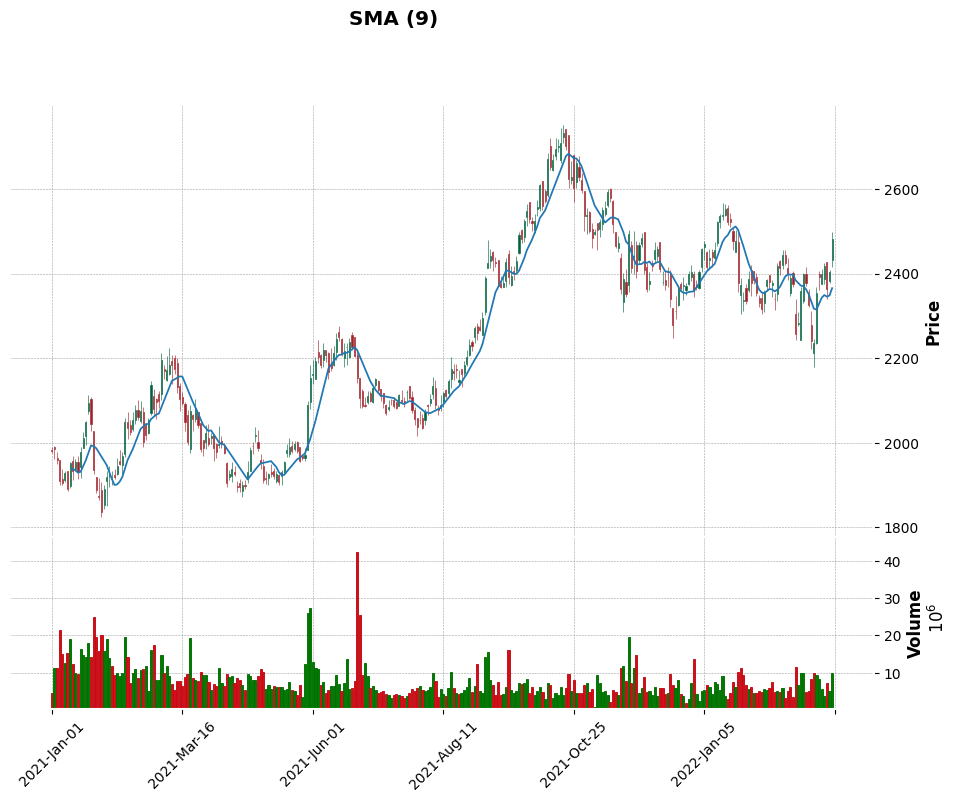

In [11]:
# cherry pick what to show on the chart
bands_plot = pd.concat([data['sma_9']], axis=1)

apd = mpf.make_addplot(bands_plot.tail(300))

mpf.plot(data.tail(300), type='candle', style='charles',
        title='SMA (9)',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [ ]:
# https://in.tradingview.com/chart/RELIANCE/3GRPpmnB-simple-moving-average-idea/